# Objective 1. Develop a financial forecasting model that can predict future revenue, expenses, and profit.

# Data Reading

In [1]:
# import the libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('financial_data.csv')

In [3]:
print("Data Head:\n", df.head())

Data Head:
                          name   NSE_code BSE_code                   sector  \
0               3M India Ltd.    3MINDIA   523395      GENERAL INDUSTRIALS   
1                    ACC Ltd.        ACC   500410  CEMENT AND CONSTRUCTION   
2        AIA Engineering Ltd.     AIAENG   532683      GENERAL INDUSTRIALS   
3       APL Apollo Tubes Ltd.  APLAPOLLO   533758          METALS & MINING   
4  Au Small Finance Bank Ltd.     AUBANK   540611      BANKING AND FINANCE   

                   industry  revenue operating_expenses operating_profit  \
0      INDUSTRIAL MACHINERY    1,057              847.4            192.1   
1  CEMENT & CEMENT PRODUCTS  4,644.8            3,885.4            549.3   
2    OTHER INDUSTRIAL GOODS  1,357.1              912.7            382.1   
3     IRON & STEEL PRODUCTS    4,650            4,305.4              325   
4                     BANKS  2,956.5            1,026.7            647.7   

  operating_profit_margin depreciation interest profit_before_

# Exploratory Data Analysis

In [4]:
print("\nDescriptive Stats:\n", df.describe())


Descriptive Stats:
                EPS      EPS_TTM
count   500.000000   498.000000
mean     15.252400    54.043775
std      66.113983   193.529196
min     -32.400000  -214.800000
25%       2.100000     8.900000
50%       5.350000    22.400000
75%      14.200000    52.675000
max    1383.300000  3988.000000


In [5]:
# 2. Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 name                       0
NSE_code                   0
BSE_code                   0
sector                     0
industry                   0
revenue                    1
operating_expenses         1
operating_profit           1
operating_profit_margin    1
depreciation               1
interest                   1
profit_before_tax          1
tax                        1
net_profit                 1
EPS                        1
profit_TTM                 3
EPS_TTM                    3
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
# 4. Feature Encoding - Encode categorical columns for correlation and feature importance analysis
# Encoding 'sector' and 'industry' if needed
if 'sector' in df.columns:
    le = LabelEncoder()
    df['sector'] = le.fit_transform(df['sector'])
if 'industry' in df.columns:
    df['industry'] = le.fit_transform(df['industry'])

In [7]:
# 5. Select Features for Modeling (Drop irrelevant columns for now)
# Based on initial assessment, we can drop NSE_code, BSE_code
df = df.drop(columns=['NSE_code', 'BSE_code','name','operating_profit_margin'], errors='ignore')

In [8]:

# Step 1: Remove commas from columns that should be numeric
df = df.replace({',': ''}, regex=True)

# Step 2: Convert relevant columns to numeric
numeric_columns = ['revenue', 'operating_expenses', 'operating_profit', 
                   'depreciation', 'interest', 'profit_before_tax', 'tax', 'net_profit', 
                   'EPS', 'profit_TTM', 'EPS_TTM']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Check for missing values after conversion (optional)
print(df.isnull().sum())

# Step 4: Drop rows with missing numerical data (optional, depending on data quality)
df_cleaned = df.dropna(subset=numeric_columns)

sector                0
industry              0
revenue               1
operating_expenses    1
operating_profit      1
depreciation          1
interest              1
profit_before_tax     1
tax                   1
net_profit            1
EPS                   1
profit_TTM            3
EPS_TTM               3
dtype: int64


In [9]:
# Step 3: Check for missing values after conversion (optional)
print(df_cleaned.isnull().sum())

sector                0
industry              0
revenue               0
operating_expenses    0
operating_profit      0
depreciation          0
interest              0
profit_before_tax     0
tax                   0
net_profit            0
EPS                   0
profit_TTM            0
EPS_TTM               0
dtype: int64


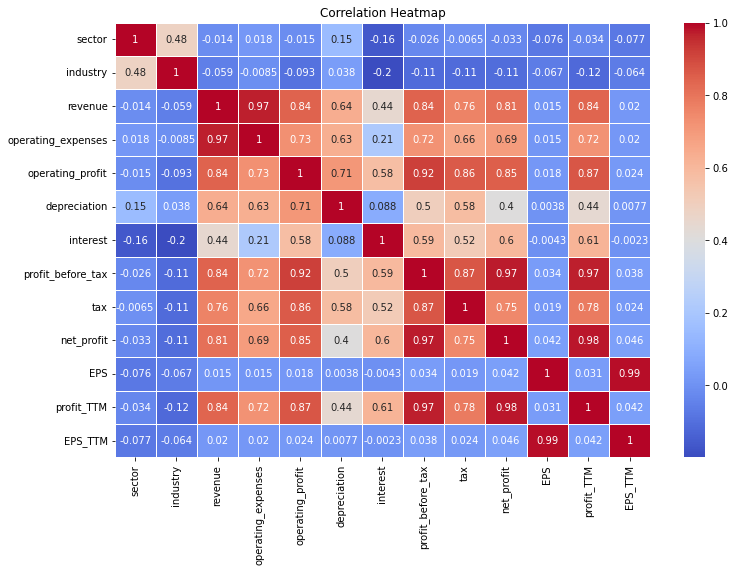

In [10]:
# 3. Correlation Heatmap - To check correlation among numeric features
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Step 4: Drop columns with low correlation to target variables (like 'revenue', 'operating_expenses', and 'profit')
# Example: We assume that you want to keep columns that have strong correlation with revenue or net profit
# Set a threshold for correlation (e.g., keep columns with absolute correlation > 0.3)
correlation_threshold = 0.3
correlation_matrix = df_cleaned.corr()

# Find the correlation of each feature with the target columns
relevant_features = correlation_matrix[(correlation_matrix['revenue'].abs() > correlation_threshold) |
                                       (correlation_matrix['net_profit'].abs() > correlation_threshold)].index

# Filter the dataset to keep only relevant features
df_final = df_cleaned[relevant_features]

In [12]:
# Display the final dataset
print("\nCleaned Dataset:\n", df_final.head())


Cleaned Dataset:
    revenue  operating_expenses  operating_profit  depreciation  interest  \
0   1057.0               847.4             192.1          12.9       0.7   
1   4644.8              3885.4             549.3         212.8      28.9   
2   1357.1               912.7             382.1          24.5       7.4   
3   4650.0              4305.4             325.0          41.3      26.6   
4   2956.5              1026.7             647.7           0.0    1282.1   

   profit_before_tax    tax  net_profit  profit_TTM  
0              195.9   49.8       146.1       535.9  
1              517.7  131.5       387.9      1202.7  
2              412.5   88.4       323.1      1216.1  
3              276.7   73.8       202.9       767.5  
4              533.4  131.5       401.8      1606.2  


In [13]:
# Save cleaned data to CSV
df_final.to_csv('cleaned_financial_data.csv', index=False)

In [14]:
df_new = pd.read_csv('cleaned_financial_data.csv')

In [15]:
df_new.head()

,revenue,operating_expenses,operating_profit,depreciation,interest,profit_before_tax,tax,net_profit,profit_TTM
0,1057.0,847.4,192.1,12.9,0.7,195.9,49.8,146.1,535.9
1,4644.8,3885.4,549.3,212.8,28.9,517.7,131.5,387.9,1202.7
2,1357.1,912.7,382.1,24.5,7.4,412.5,88.4,323.1,1216.1
3,4650.0,4305.4,325.0,41.3,26.6,276.7,73.8,202.9,767.5
4,2956.5,1026.7,647.7,0.0,1282.1,533.4,131.5,401.8,1606.2


# Method 1

# Using Linear Regression Method

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming df_cleaned contains your cleaned data
df = df_new

# Step 1: Prepare the features (X) and target variables (y)
# Features: We'll use all columns except the target column we're predicting
X = df.drop(['revenue', 'operating_expenses', 'net_profit'], axis=1)

# Targets: revenue, operating_expenses, net_profit
y_revenue = df['revenue']
y_expenses = df['operating_expenses']
y_profit = df['net_profit']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_revenue_train, y_revenue_test = train_test_split(X, y_revenue, test_size=0.2, random_state=42)
_, _, y_expenses_train, y_expenses_test = train_test_split(X, y_expenses, test_size=0.2, random_state=42)
_, _, y_profit_train, y_profit_test = train_test_split(X, y_profit, test_size=0.2, random_state=42)

# Step 3: Train the models using Linear Regression (you can use more complex models later)
model_revenue = LinearRegression()
model_expenses = LinearRegression()
model_profit = LinearRegression()

# Fit the models
model_revenue.fit(X_train, y_revenue_train)
model_expenses.fit(X_train, y_expenses_train)
model_profit.fit(X_train, y_profit_train)

# Step 4: Make predictions
revenue_pred = model_revenue.predict(X_test)
expenses_pred = model_expenses.predict(X_test)
profit_pred = model_profit.predict(X_test)

# Step 5: Evaluate the models
def evaluate_model(y_true, y_pred, target_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{target_name} - MAE: {mae}, RMSE: {rmse}')

evaluate_model(y_revenue_test, revenue_pred, "Revenue")
evaluate_model(y_expenses_test, expenses_pred, "Operating Expenses")
evaluate_model(y_profit_test, profit_pred, "Net Profit")



Revenue - MAE: 4772.302963849614, RMSE: 17499.420993995154
Operating Expenses - MAE: 4776.303183056522, RMSE: 17528.49345955405
Net Profit - MAE: 56.4576244071672, RMSE: 142.02839324198374


# Method 2

## Using Random Forest Regressor

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import optuna

# Assuming df_cleaned contains your cleaned data
df = df_new

# Drop any non-numeric columns if necessary
X = df.drop(['revenue', 'operating_expenses', 'net_profit'], axis=1)

# Target variables
y_revenue = df['revenue']
y_expenses = df['operating_expenses']
y_profit = df['net_profit']

# Step 2: Train/Test split
X_train, X_test, y_revenue_train, y_revenue_test = train_test_split(X, y_revenue, test_size=0.2, random_state=42)
_, _, y_expenses_train, y_expenses_test = train_test_split(X, y_expenses, test_size=0.2, random_state=42)
_, _, y_profit_train, y_profit_test = train_test_split(X, y_profit, test_size=0.2, random_state=42)

# Step 3: Hyperparameter Tuning with Random Forest

def optimize_random_forest(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 4, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    model_rf = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        random_state=42
    )
    
    # K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model_rf, X_train, y_revenue_train, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-np.mean(scores))
    
    return rmse

# Optuna for Hyperparameter Tuning
study = optuna.create_study(direction='minimize')
study.optimize(optimize_random_forest, n_trials=20)

# Best hyperparameters for Random Forest
best_params_rf = study.best_params
print("Best Random Forest Params:", best_params_rf)

# Fit Random Forest with the best params
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_revenue_train)
revenue_pred_rf = best_rf.predict(X_test)

# Step 4: Hyperparameter Tuning with XGBoost

def optimize_xgboost(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)

    model_xgb = XGBRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        learning_rate=learning_rate, 
        random_state=42
    )
    
    # K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model_xgb, X_train, y_revenue_train, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-np.mean(scores))
    
    return rmse

# Optuna for Hyperparameter Tuning
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(optimize_xgboost, n_trials=20)

# Best hyperparameters for XGBoost
best_params_xgb = study_xgb.best_params
print("Best XGBoost Params:", best_params_xgb)

# Fit XGBoost with the best params
best_xgb = XGBRegressor(**best_params_xgb, random_state=42)
best_xgb.fit(X_train, y_revenue_train)
revenue_pred_xgb = best_xgb.predict(X_test)

# Step 5: Evaluate the models

def evaluate_model(y_true, y_pred, target_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{target_name} - MAE: {mae}, RMSE: {rmse}')

print("\nEvaluation for Random Forest:")
evaluate_model(y_revenue_test, revenue_pred_rf, "Revenue (Random Forest)")

print("\nEvaluation for XGBoost:")
evaluate_model(y_revenue_test, revenue_pred_xgb, "Revenue (XGBoost)")



[I 2024-09-16 14:11:15,079] A new study created in memory with name: no-name-752369f2-4b80-4706-8dd9-cbe28aaaa3c6
[I 2024-09-16 14:11:18,660] Trial 0 finished with value: 10800.210391635188 and parameters: {'n_estimators': 458, 'max_depth': 19, 'min_samples_split': 8}. Best is trial 0 with value: 10800.210391635188.
[I 2024-09-16 14:11:19,028] Trial 1 finished with value: 10114.946522223052 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 2}. Best is trial 1 with value: 10114.946522223052.
[I 2024-09-16 14:11:20,057] Trial 2 finished with value: 10807.417790526397 and parameters: {'n_estimators': 140, 'max_depth': 19, 'min_samples_split': 8}. Best is trial 1 with value: 10114.946522223052.
[I 2024-09-16 14:11:23,427] Trial 3 finished with value: 10806.02774819116 and parameters: {'n_estimators': 464, 'max_depth': 13, 'min_samples_split': 8}. Best is trial 1 with value: 10114.946522223052.
[I 2024-09-16 14:11:24,728] Trial 4 finished with value: 10888.6993447555

Best Random Forest Params: {'n_estimators': 237, 'max_depth': 6, 'min_samples_split': 3}


[I 2024-09-16 14:11:57,453] A new study created in memory with name: no-name-b4847f40-880b-484f-9923-1d807d897b0b
[I 2024-09-16 14:12:03,819] Trial 0 finished with value: 11567.912738173858 and parameters: {'n_estimators': 284, 'max_depth': 9, 'learning_rate': 0.14022828278759075}. Best is trial 0 with value: 11567.912738173858.
[I 2024-09-16 14:12:04,574] Trial 1 finished with value: 11982.338427709303 and parameters: {'n_estimators': 167, 'max_depth': 11, 'learning_rate': 0.03324574097061238}. Best is trial 0 with value: 11567.912738173858.
[I 2024-09-16 14:12:05,229] Trial 2 finished with value: 11949.733172412067 and parameters: {'n_estimators': 89, 'max_depth': 15, 'learning_rate': 0.08735521715017795}. Best is trial 0 with value: 11567.912738173858.
[I 2024-09-16 14:12:07,607] Trial 3 finished with value: 11601.213870774218 and parameters: {'n_estimators': 177, 'max_depth': 16, 'learning_rate': 0.17889794475721457}. Best is trial 0 with value: 11567.912738173858.
[I 2024-09-16 14

Best XGBoost Params: {'n_estimators': 306, 'max_depth': 3, 'learning_rate': 0.25726252935646343}

Evaluation for Random Forest:
Revenue (Random Forest) - MAE: 4501.242254383819, RMSE: 17729.444510121055

Evaluation for XGBoost:
Revenue (XGBoost) - MAE: 4984.601291061401, RMSE: 18967.859159973483


# Develop a risk management model that can identify and quantify financial risks

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming df_cleaned contains your cleaned data
df = df_new

# Step 1: Calculate historical volatility
# We calculate volatility as the standard deviation of percentage change in revenue or profits
df['revenue_pct_change'] = df['revenue'].pct_change()  # Calculate percentage change in revenue
df['profit_pct_change'] = df['net_profit'].pct_change()  # Calculate percentage change in net profit

# Drop NaN values due to pct_change
df.dropna(inplace=True)

# Step 2: Calculate Volatility (Standard Deviation of Percentage Change)
volatility_revenue = np.std(df['revenue_pct_change']) * np.sqrt(252)  # Annualized volatility
volatility_profit = np.std(df['profit_pct_change']) * np.sqrt(252)

print(f"Annualized Volatility of Revenue: {volatility_revenue}")
print(f"Annualized Volatility of Net Profit: {volatility_profit}")

# Step 3: Value at Risk (VaR) Calculation
confidence_level = 0.95  # 95% confidence level
mean_revenue = np.mean(df['revenue_pct_change'])
std_revenue = np.std(df['revenue_pct_change'])

# Using Z-Score for VaR calculation
VaR_revenue = norm.ppf(1 - confidence_level) * std_revenue + mean_revenue
VaR_profit = norm.ppf(1 - confidence_level) * np.std(df['profit_pct_change']) + np.mean(df['profit_pct_change'])

print(f"VaR for Revenue (95% confidence): {VaR_revenue * 100:.2f}%")
print(f"VaR for Net Profit (95% confidence): {VaR_profit * 100:.2f}%")

# Step 4: Conditional Value at Risk (CVaR) Calculation
CVaR_revenue = mean_revenue - (norm.pdf(norm.ppf(1 - confidence_level)) * std_revenue / (1 - confidence_level))
CVaR_profit = np.mean(df['profit_pct_change']) - (norm.pdf(norm.ppf(1 - confidence_level)) * np.std(df['profit_pct_change']) / (1 - confidence_level))

print(f"CVaR for Revenue (95% confidence): {CVaR_revenue * 100:.2f}%")
print(f"CVaR for Net Profit (95% confidence): {CVaR_profit * 100:.2f}%")

# Step 5: Monte Carlo Simulation for Future Risk Prediction

# Simulate potential future outcomes using historical data
num_simulations = 10000
simulation_horizon = 252  # One year of trading days

# Create an empty matrix to store the simulation results
revenue_simulations = np.zeros((simulation_horizon, num_simulations))
profit_simulations = np.zeros((simulation_horizon, num_simulations))

# Generate random simulations based on normal distribution
for i in range(num_simulations):
    revenue_simulations[:, i] = np.cumprod(1 + np.random.normal(mean_revenue, std_revenue, simulation_horizon))
    profit_simulations[:, i] = np.cumprod(1 + np.random.normal(np.mean(df['profit_pct_change']), np.std(df['profit_pct_change']), simulation_horizon))





Annualized Volatility of Revenue: 467.3210861009448
Annualized Volatility of Net Profit: 515.1456768384614
VaR for Revenue (95% confidence): -4266.41%
VaR for Net Profit (95% confidence): -4931.08%
CVaR for Revenue (95% confidence): -5496.52%
CVaR for Net Profit (95% confidence): -6287.08%
